## Working on Advertising dataset:

We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
%matplotlib inline

In [4]:
ad_data = pd.read_csv("advertising.csv")

In [16]:
sns.set_style("whitegrid")

In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


<Axes: xlabel='Age', ylabel='Count'>

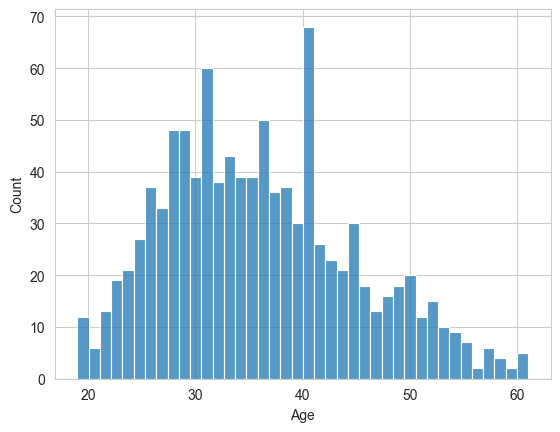

In [17]:
sns.histplot(data=ad_data,x="Age",bins=40)

In [23]:
ad_data["Timestamp"] = pd.to_datetime(ad_data["Timestamp"])

In [25]:
ad_data["Hour"] = ad_data["Timestamp"].dt.hour
ad_data["Weekday"] = ad_data["Timestamp"].dt.weekday

In [26]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,4


<Axes: xlabel='Male', ylabel='count'>

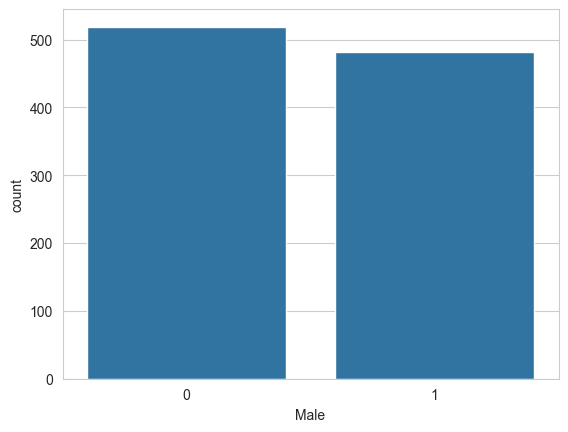

In [28]:
sns.countplot(ad_data,x="Male")

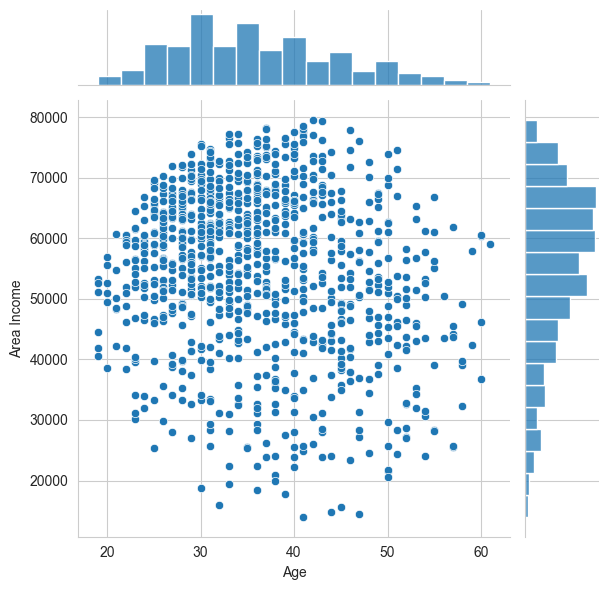

In [30]:
sns.jointplot(ad_data,y="Area Income",x="Age")

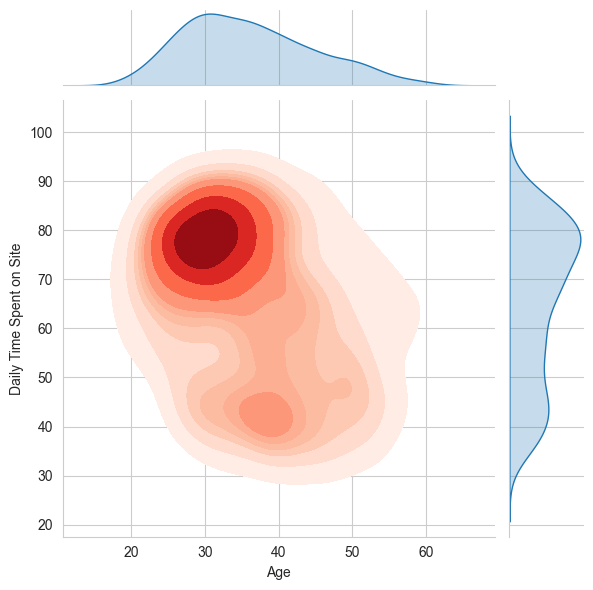

In [63]:
sns.jointplot(ad_data,y="Daily Time Spent on Site",x="Age",kind = "kde",cmap="Reds",fill=True)

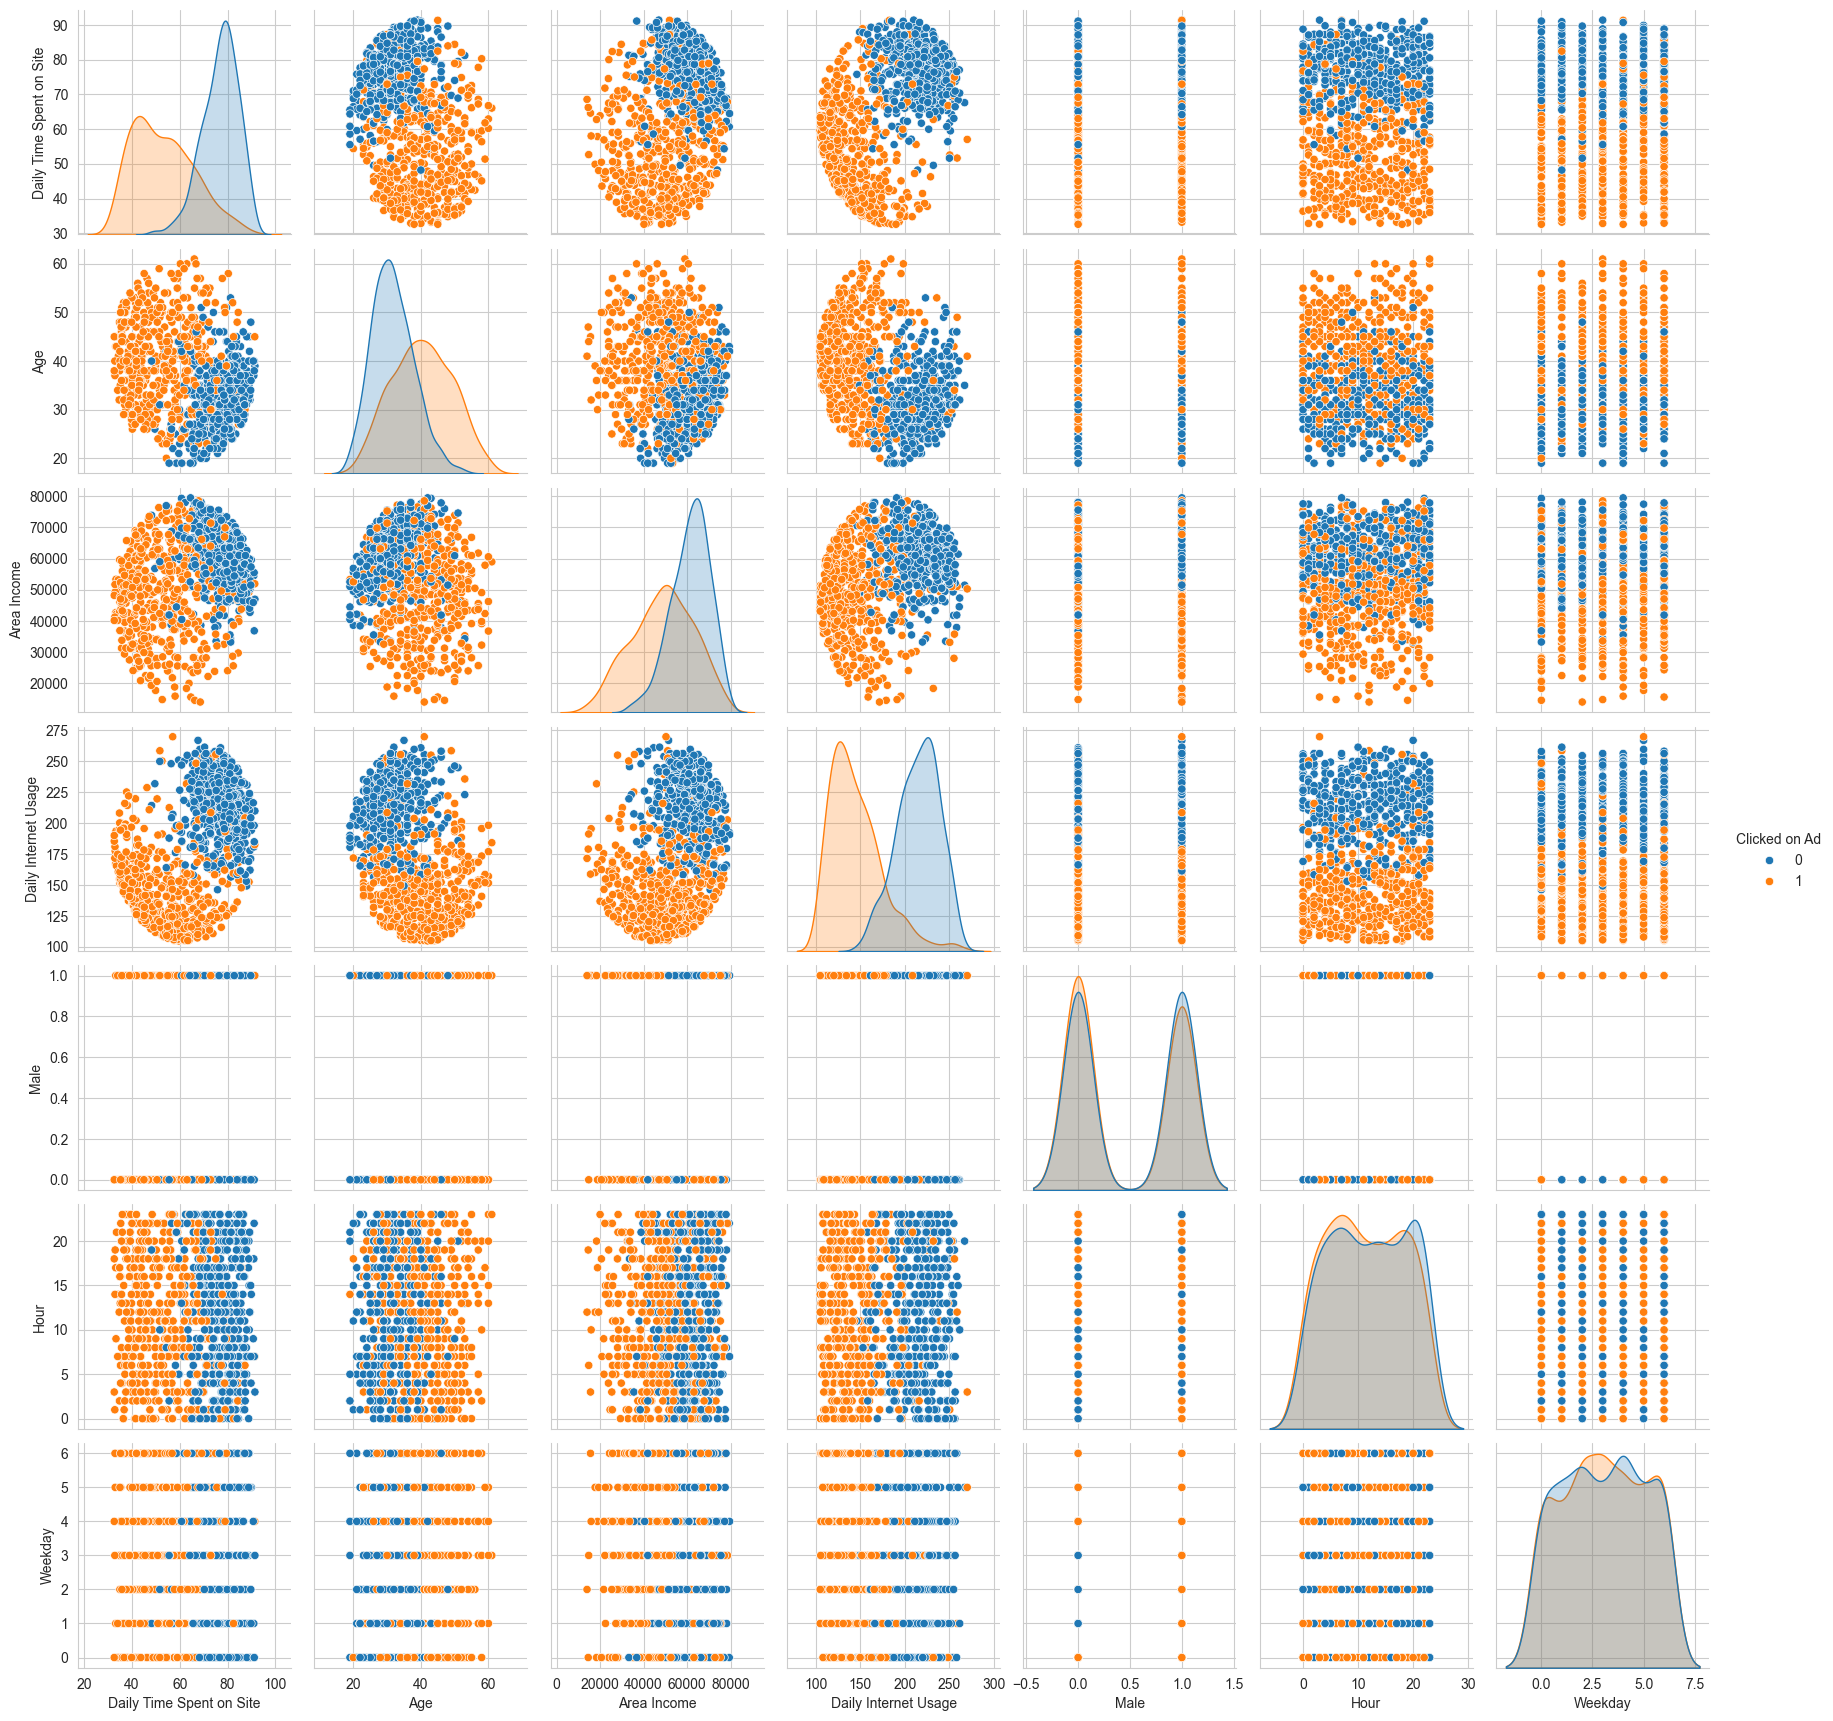

In [39]:
sns.pairplot(ad_data,hue="Clicked on Ad")

<Axes: xlabel='Area Income', ylabel='Age'>

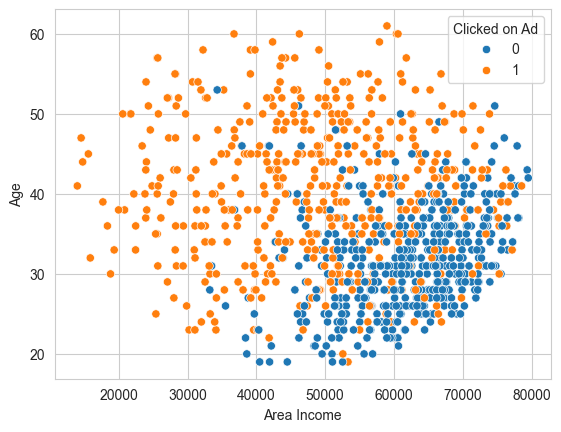

In [40]:
sns.scatterplot(ad_data,y="Age",x="Area Income",hue="Clicked on Ad")

In [41]:
city_freq = ad_data['City'].value_counts() / len(ad_data)

In [42]:
city_freq

City
Lisamouth        0.003
Williamsport     0.003
West Amanda      0.002
East Timothy     0.002
Lake Patrick     0.002
                 ...  
Nicholasland     0.001
Duffystad        0.001
New Darlene      0.001
South Jessica    0.001
Lake Matthew     0.001
Name: count, Length: 969, dtype: float64

In [43]:
ad_data['City_FE'] = ad_data['City'].map(city_freq)

In [44]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Weekday,City_FE
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,6,0.002
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,0,0.001
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,6,0.001
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,6,0.001
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,4,0.001


In [45]:
ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']].describe()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


In [49]:
ad_data.drop(["Ad Topic Line","City","Country","Timestamp"],axis=1,inplace=True)

In [51]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,Weekday,City_FE
0,68.95,35,61833.90,256.09,0,0,0,6,0.002
1,80.23,31,68441.85,193.77,1,0,1,0,0.001
2,69.47,26,59785.94,236.50,0,0,20,6,0.001
3,74.15,29,54806.18,245.89,1,0,2,6,0.001
4,68.37,35,73889.99,225.58,0,0,3,4,0.001


In [52]:
continuous_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Hour', 'Weekday', 'City_FE']


Using the Scaled model for training and testing

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ad_data_scaled = ad_data.copy()

# Apply scaling only to selected columns
ad_data_scaled[continuous_features] = scaler.fit_transform(ad_data[continuous_features])


In [54]:
ad_data_scaled.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,Weekday,City_FE
0,0.249267,-0.114905,0.509691,1.734030,0,0,-1.675896,1.469856,3.441741
1,0.961132,-0.570425,1.002530,0.313805,1,0,-1.532166,-1.533937,-0.243207
2,0.282083,-1.139826,0.356949,1.287589,0,0,1.198711,1.469856,-0.243207
3,0.577432,-0.798185,-0.014456,1.501580,1,0,-1.388436,1.469856,-0.243207
4,0.212664,-0.114905,1.408868,1.038731,0,0,-1.244705,0.468592,-0.243207


In [55]:
from sklearn.model_selection import train_test_split

X = ad_data_scaled.drop('Clicked on Ad', axis=1)
y = ad_data_scaled['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
logregmodel = LogisticRegression()

In [58]:
logregmodel.fit(X_train,y_train)

LogisticRegression()

In [59]:
predictions = logregmodel.predict(X_test)

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       146
           1       0.97      0.96      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [61]:
confusion_matrix(y_test,predictions)

array([[141,   5],
       [  6, 148]])

Using the non Scaled Model for the training and testing

In [64]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,Weekday,City_FE
0,68.95,35,61833.90,256.09,0,0,0,6,0.002
1,80.23,31,68441.85,193.77,1,0,1,0,0.001
2,69.47,26,59785.94,236.50,0,0,20,6,0.001
3,74.15,29,54806.18,245.89,1,0,2,6,0.001
4,68.37,35,73889.99,225.58,0,0,3,4,0.001


In [65]:
X = ad_data.drop("Clicked on Ad",axis=1)
y = ad_data["Clicked on Ad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [66]:
logmodel = LogisticRegression()

In [67]:
logmodel.fit(X_train,y_train)

d:\GITHUB repository learnings\Learnings\lrnenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
pred = logmodel.predict(X_test)

In [69]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       146
           1       0.95      0.84      0.89       154

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300

[[139   7]
 [ 25 129]]


## For the Scaled Model

In [73]:

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logregmodel.coef_[0]
})

# Sort by absolute importance
coef_df['Abs_Coeff'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coeff', ascending=False)
print(coef_df)


                    Feature  Coefficient  Abs_Coeff
3      Daily Internet Usage    -2.675865   2.675865
0  Daily Time Spent on Site    -2.535585   2.535585
2               Area Income    -1.607770   1.607770
1                       Age     1.266240   1.266240
4                      Male    -0.557024   0.557024
6                   Weekday     0.280087   0.280087
7                   City_FE    -0.087003   0.087003
5                      Hour    -0.071280   0.071280


C:\Users\sthaa\AppData\Local\Temp\ipykernel_12716\3149741312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')


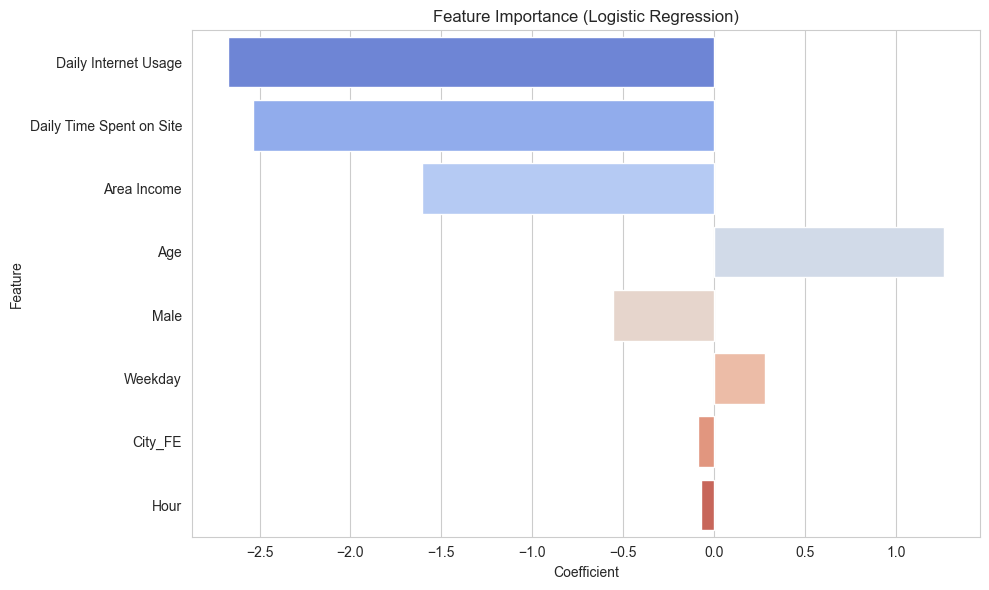

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Feature Importance (Logistic Regression)')
plt.tight_layout()
plt.show()


## For the unscaled Model

In [75]:

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logmodel.coef_[0]
})

# Sort by absolute importance
coef_df['Abs_Coeff'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coeff', ascending=False)
print(coef_df)


                    Feature  Coefficient  Abs_Coeff
1                       Age     0.263643   0.263643
5                      Hour     0.075207   0.075207
0  Daily Time Spent on Site    -0.055050   0.055050
3      Daily Internet Usage    -0.033211   0.033211
6                   Weekday     0.029078   0.029078
4                      Male     0.003128   0.003128
2               Area Income    -0.000015   0.000015
7                   City_FE     0.000010   0.000010


C:\Users\sthaa\AppData\Local\Temp\ipykernel_12716\2641753325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')


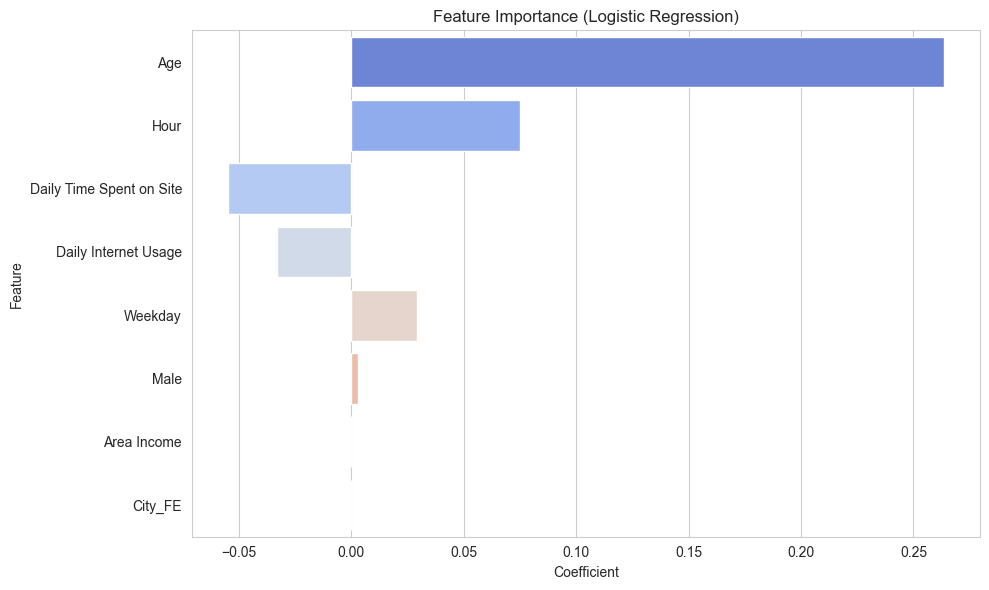

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Feature Importance (Logistic Regression)')
plt.tight_layout()
plt.show()